In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import mesa
from rock_scissors_paper.model_original import RockScissorsPaperO

In [133]:
model_params = {
    "height": 32,#100,
    "width": 32,#100,
    "hex": False,
    "init0": 0.5,
    "init1": 0.3,
    "init2": 0.2,
    "inv0": 0.2,
    "inv1": 0.5,
    "inv2": 0.3,
    "color_map": [{
        0: 'red',
        1: 'purple',
        2: 'yellow',
    }]
}
import random
random.seed(0)
results = mesa.batch_run(
    RockScissorsPaperO,
    parameters=model_params,
    iterations=1,
    max_steps=1000, # 1000
    number_processes=1,
    data_collection_period=1,
    display_progress=True,
)

results_df= pd.DataFrame(results)
results_df.rename(columns={0: "rock", 1: "scissors", 2: "paper"}, inplace=True)
results_df

  0%|          | 0/1 [00:00<?, ?it/s]

,RunId,iteration,Step,height,width,hex,init0,init1,init2,inv0,inv1,inv2,color_map,rock,scissors,paper
0,0,0,0,32,32,False,0.5,0.3,0.2,0.2,0.5,0.3,"{0: 'red', 1: 'purple', 2: 'yellow'}",499,316,209
1,0,0,1,32,32,False,0.5,0.3,0.2,0.2,0.5,0.3,"{0: 'red', 1: 'purple', 2: 'yellow'}",506,309,209
2,0,0,2,32,32,False,0.5,0.3,0.2,0.2,0.5,0.3,"{0: 'red', 1: 'purple', 2: 'yellow'}",509,317,198
3,0,0,3,32,32,False,0.5,0.3,0.2,0.2,0.5,0.3,"{0: 'red', 1: 'purple', 2: 'yellow'}",505,327,192
4,0,0,4,32,32,False,0.5,0.3,0.2,0.2,0.5,0.3,"{0: 'red', 1: 'purple', 2: 'yellow'}",520,325,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0,0,996,32,32,False,0.5,0.3,0.2,0.2,0.5,0.3,"{0: 'red', 1: 'purple', 2: 'yellow'}",553,244,227
997,0,0,997,32,32,False,0.5,0.3,0.2,0.2,0.5,0.3,"{0: 'red', 1: 'purple', 2: 'yellow'}",530,247,247
998,0,0,998,32,32,False,0.5,0.3,0.2,0.2,0.5,0.3,"{0: 'red', 1: 'purple', 2: 'yellow'}",518,251,255
999,0,0,999,32,32,False,0.5,0.3,0.2,0.2,0.5,0.3,"{0: 'red', 1: 'purple', 2: 'yellow'}",516,259,249


<Axes: >

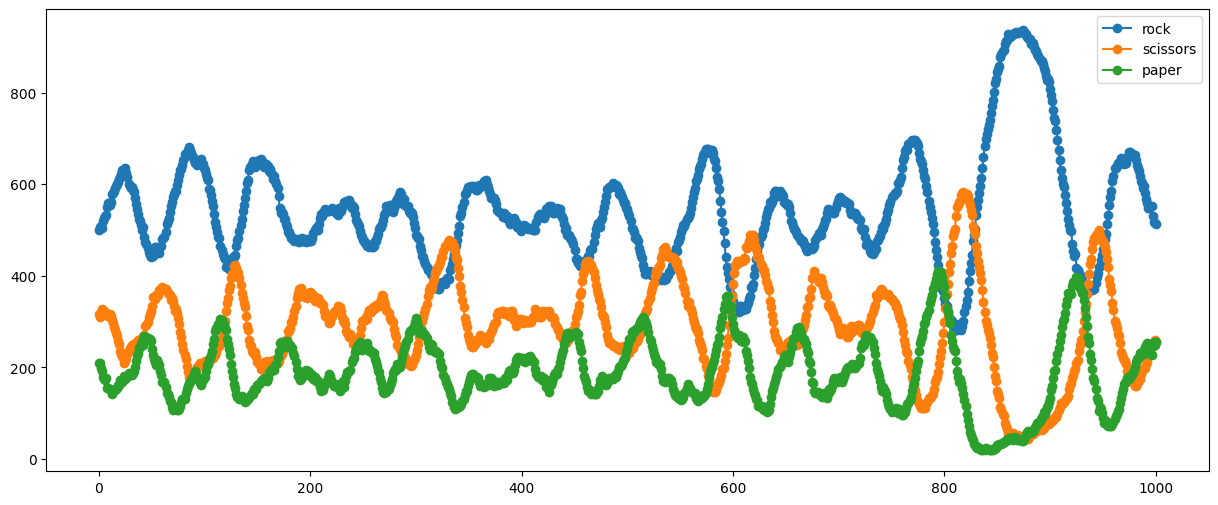

In [134]:
_, axs = plt.subplots(1, figsize=(15, 6))
results_df[["rock", "scissors", "paper"]].plot(ax=axs, style='-o')

In [135]:
fig = px.scatter_ternary(
    results_df,
    a="paper",
    b="rock",
    c="scissors",
    color=results_df.index,
    size_max=10,
    title="RSP Model"
    )
fig.update_traces(mode='lines+markers', line=dict(color='black'))
fig.update_layout(coloraxis_colorbar=dict(title='Time'))

In [142]:
model_params = {
    "height": 100,#500
    "width": 100,#500
    "hex": False,
    "init0": 0.33,
    "init1": 0.33,
    "init2": 0.33,
    "inv0": 0.2,
    "inv1": 0.5,
    "inv2": 0.3,
    "color_map": [{
        0: 'red',
        1: 'purple',
        2: 'yellow',
    }]
}
results = mesa.batch_run(
    RockScissorsPaperO,
    parameters=model_params,
    iterations=1,
    max_steps=300,
    number_processes=1,
    data_collection_period=1,
    display_progress=True,
)

results_df= pd.DataFrame(results)
results_df.rename(columns={0: "rock", 1: "scissors", 2: "paper"}, inplace=True)
results_df

  0%|          | 0/1 [00:00<?, ?it/s]

,RunId,iteration,Step,height,width,hex,init0,init1,init2,inv0,inv1,inv2,color_map,rock,scissors,paper
0,0,0,0,100,100,False,0.33,0.33,0.33,0.2,0.5,0.3,"{0: 'red', 1: 'purple', 2: 'yellow'}",3318,3426,3256
1,0,0,1,100,100,False,0.33,0.33,0.33,0.2,0.5,0.3,"{0: 'red', 1: 'purple', 2: 'yellow'}",3224,3730,3046
2,0,0,2,100,100,False,0.33,0.33,0.33,0.2,0.5,0.3,"{0: 'red', 1: 'purple', 2: 'yellow'}",3183,4006,2811
3,0,0,3,100,100,False,0.33,0.33,0.33,0.2,0.5,0.3,"{0: 'red', 1: 'purple', 2: 'yellow'}",3180,4269,2551
4,0,0,4,100,100,False,0.33,0.33,0.33,0.2,0.5,0.3,"{0: 'red', 1: 'purple', 2: 'yellow'}",3236,4466,2298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,0,0,296,100,100,False,0.33,0.33,0.33,0.2,0.5,0.3,"{0: 'red', 1: 'purple', 2: 'yellow'}",5439,2705,1856
297,0,0,297,100,100,False,0.33,0.33,0.33,0.2,0.5,0.3,"{0: 'red', 1: 'purple', 2: 'yellow'}",5395,2714,1891
298,0,0,298,100,100,False,0.33,0.33,0.33,0.2,0.5,0.3,"{0: 'red', 1: 'purple', 2: 'yellow'}",5392,2717,1891
299,0,0,299,100,100,False,0.33,0.33,0.33,0.2,0.5,0.3,"{0: 'red', 1: 'purple', 2: 'yellow'}",5393,2698,1909


<Axes: >

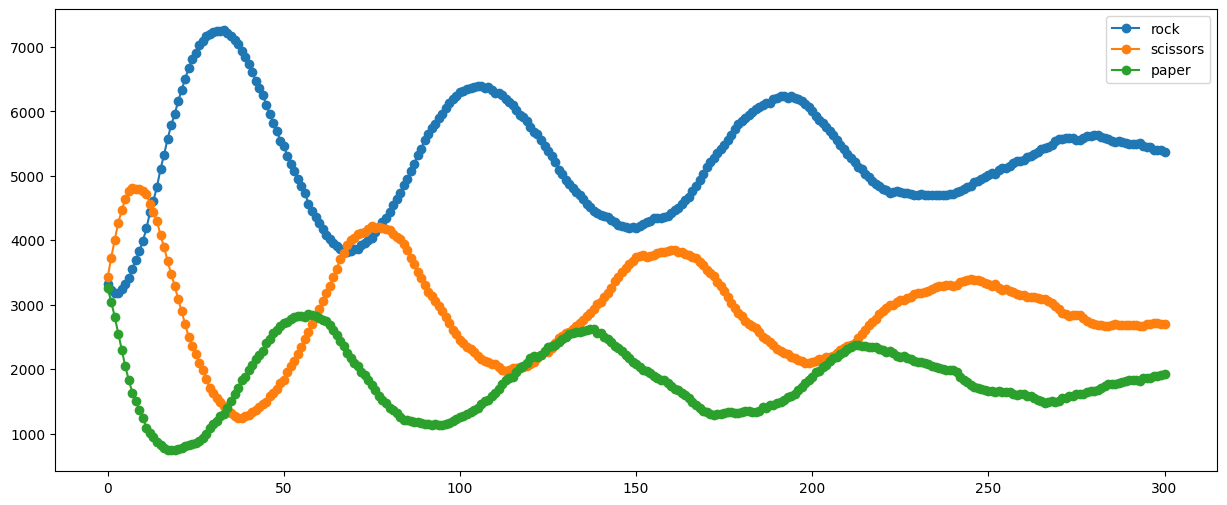

In [143]:
_, axs = plt.subplots(1, figsize=(15, 6))
results_df[["rock", "scissors", "paper"]].plot(ax=axs, style='-o')

In [144]:
fig = px.scatter_ternary(
    results_df,
    a="paper",
    b="rock",
    c="scissors",
    color=results_df.index,
    size_max=10,
    title="RSP Model"
    )
fig.update_traces(mode='lines+markers', line=dict(color='black'))
fig.update_layout(coloraxis_colorbar=dict(title='Time'))

In [82]:
R, S = np.mgrid[0:1:7j, 0:1:7j]
R, S = R.ravel(), S.ravel()
mask = R + S <= 1
R, S = R[mask], S[mask]
P = 1 - R - S
enthalpy = (R - 0.5) * (S - 0.5) * (P - 1)**2

In [84]:
A = np.array([R, S, P]).T
A = A[~np.any(A == 0, axis=1)]
A.T

array([[1.66666667e-01, 1.66666667e-01, 1.66666667e-01, 1.66666667e-01,
        1.66666667e-01, 3.33333333e-01, 3.33333333e-01, 3.33333333e-01,
        3.33333333e-01, 5.00000000e-01, 5.00000000e-01, 6.66666667e-01,
        6.66666667e-01, 8.33333333e-01],
       [1.66666667e-01, 3.33333333e-01, 5.00000000e-01, 6.66666667e-01,
        8.33333333e-01, 1.66666667e-01, 3.33333333e-01, 5.00000000e-01,
        6.66666667e-01, 1.66666667e-01, 3.33333333e-01, 1.66666667e-01,
        3.33333333e-01, 1.66666667e-01],
       [6.66666667e-01, 5.00000000e-01, 3.33333333e-01, 1.66666667e-01,
        1.11022302e-16, 5.00000000e-01, 3.33333333e-01, 1.66666667e-01,
        1.11022302e-16, 3.33333333e-01, 1.66666667e-01, 1.66666667e-01,
        5.55111512e-17, 8.32667268e-17]])

In [93]:
import plotly.figure_factory as ff
fig = ff.create_ternary_contour(
    A.T, enthalpy[:A.shape[0]],
    pole_labels=['R', 'S', 'P'],
    interp_mode='cartesian',
    ncontours=20,
    colorscale='Viridis',
    coloring='lines', # 'fill', 'heatmap'
    showmarkers=True,
    showscale=True
)
fig.show()